In [175]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

data_path = '/content/drive/My Drive/Statistical Deep Learning/HW3/TSLA.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


df=pd.read_csv(data_path)
print("Number of rows and columns:", df.shape)
df.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


### Train Test Split

In [177]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

### Scaling and Preprocessing the Data

In [178]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 1 lag and 1 output
X_train_1 = []
y_train_1 = []
for i in range(1, 800):
    X_train_1.append(training_set_scaled[i-1:i, 0])
    y_train_1.append(training_set_scaled[i, 0])
X_train_1, y_train_1 = np.array(X_train_1), np.array(y_train_1)
X_train_1 = np.reshape(X_train_1, (X_train_1.shape[0], X_train_1.shape[1], 1))
#(799, 1, 1)

# Creating a data structure with 7 lags and 1 output. Note that the stock market is
# closed on weekends so the previous 5 data points represent 7 days of data
X_train_7 = []
y_train_7 = []
for i in range(5, 800):
    X_train_7.append(training_set_scaled[i-5:i, 0])
    y_train_7.append(training_set_scaled[i, 0])
X_train_7, y_train_7 = np.array(X_train_7), np.array(y_train_7)
X_train_7 = np.reshape(X_train_7, (X_train_7.shape[0], X_train_7.shape[1], 1))

# Creating a data structure with 7 lags and 1 output. Note that the stock market is
# closed on weekends so the previous 10 data points represent 14 days of data
X_train_14 = []
y_train_14 = []
for i in range(10, 800):
    X_train_14.append(training_set_scaled[i-10:i, 0])
    y_train_14.append(training_set_scaled[i, 0])
X_train_14, y_train_14 = np.array(X_train_14), np.array(y_train_14)
X_train_14 = np.reshape(X_train_14, (X_train_14.shape[0], X_train_14.shape[1], 1))

In [179]:
X_train_14.shape

(790, 10, 1)

### Defining the Models
Defining 7 different models. The first 3 models correspond to data from 1 day, 7 day, and 14 day lags, with 4 hidden lstm layers in the model. The second three models correspond to the same lags, but these models have 3 hidden layers, more neurons in each layer, more dropout, and use the adagrad optimizer. The final model has 60 nuerons in each layer but no dropout. It uses the adam optimizer just like the previous set of models

In [180]:
#################
model_1_1 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_1_1.add(LSTM(units = 40, return_sequences = True, input_shape = (X_train_1.shape[1], 1)))
model_1_1.add(Dropout(0.1))
# Adding a second LSTM layer and some Dropout regularisation
model_1_1.add(LSTM(units = 40, return_sequences = True))
model_1_1.add(Dropout(0.1))
# Adding a third LSTM layer and some Dropout regularisation
model_1_1.add(LSTM(units = 40, return_sequences = True))
model_1_1.add(Dropout(0.1))
# Adding a fourth LSTM layer and some Dropout regularisation
model_1_1.add(LSTM(units = 40))
model_1_1.add(Dropout(0.1))
# Adding the output layer
model_1_1.add(Dense(units = 1))

model_1_1.compile(optimizer = 'adam', loss = 'mean_squared_error')

##################
model_1_7 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_1_7.add(LSTM(units = 40, return_sequences = True, input_shape = (X_train_7.shape[1], 1)))
model_1_7.add(Dropout(0.1))
# Adding a second LSTM layer and some Dropout regularisation
model_1_7.add(LSTM(units = 40, return_sequences = True))
model_1_7.add(Dropout(0.1))
# Adding a third LSTM layer and some Dropout regularisation
model_1_7.add(LSTM(units = 40, return_sequences = True))
model_1_7.add(Dropout(0.1))
# Adding a fourth LSTM layer and some Dropout regularisation
model_1_7.add(LSTM(units = 40))
model_1_7.add(Dropout(0.1))
# Adding the output layer
model_1_7.add(Dense(units = 1))

# Compiling the RNN
model_1_7.compile(optimizer = 'adam', loss = 'mean_squared_error')

##################
model_1_14 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_1_14.add(LSTM(units = 40, return_sequences = True, input_shape = (X_train_14.shape[1], 1)))
model_1_14.add(Dropout(0.1))
# Adding a second LSTM layer and some Dropout regularisation
model_1_14.add(LSTM(units = 40, return_sequences = True))
model_1_14.add(Dropout(0.1))
# Adding a third LSTM layer and some Dropout regularisation
model_1_14.add(LSTM(units = 40, return_sequences = True))
model_1_14.add(Dropout(0.1))
# Adding a fourth LSTM layer and some Dropout regularisation
model_1_14.add(LSTM(units = 40))
model_1_14.add(Dropout(0.1))
# Adding the output layer
model_1_14.add(Dense(units = 1))

# Compiling the RNN
model_1_14.compile(optimizer = 'adam', loss = 'mean_squared_error')

##################

model_2_1 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_2_1.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train_1.shape[1], 1)))
model_2_1.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_2_1.add(LSTM(units = 60, return_sequences = True))
model_2_1.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_2_1.add(LSTM(units = 60))
model_2_1.add(Dropout(0.2))
# Adding the output layer
model_2_1.add(Dense(units = 1))

model_2_1.compile(optimizer = 'adagrad', loss = 'mean_squared_error')


model_2_7 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_2_7.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train_7.shape[1], 1)))
model_2_7.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_2_7.add(LSTM(units = 60, return_sequences = True))
model_2_7.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_2_7.add(LSTM(units = 60))
model_2_7.add(Dropout(0.2))
# Adding the output layer
model_2_7.add(Dense(units = 1))

model_2_7.compile(optimizer = 'adagrad', loss = 'mean_squared_error')


model_2_14 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_2_14.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train_14.shape[1], 1)))
model_2_14.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_2_14.add(LSTM(units = 60, return_sequences = True))
model_2_14.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_2_14.add(LSTM(units = 60))
model_2_14.add(Dropout(0.2))
# Adding the output layer
model_2_14.add(Dense(units = 1))

# Compiling the RNN
model_2_14.compile(optimizer = 'adagrad', loss = 'mean_squared_error')


model_3_14 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_3_14.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train_14.shape[1], 1)))
# Adding a third LSTM layer and some Dropout regularisation
model_3_14.add(LSTM(units = 60, return_sequences = True))
# Adding a fourth LSTM layer and some Dropout regularisation
model_3_14.add(LSTM(units = 60))
# Adding the output layer
model_3_14.add(Dense(units = 1))

# Compiling the RNN
model_3_14.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Training. The last 4 models all use 200 epochs where the first three use only 100

In [181]:
model_1_1.fit(X_train_1, y_train_1, epochs = 100, batch_size = 32)

Epoch 1/100
25/25 [==============================] - 6s 6ms/step - loss: 0.2875
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1426
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0374
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0287
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0206
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0122
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0080
Epoch 8/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 9/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0055
Epoch 10/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0059
Epoch 11/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0056
Epoch 12/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0056
Epoch 13/100
25/25 [=================

In [182]:
model_1_7.fit(X_train_7, y_train_7, epochs = 100, batch_size = 32)

Epoch 1/100
25/25 [==============================] - 5s 7ms/step - loss: 0.1550
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0286
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0129
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0071
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0063
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0060
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0061
Epoch 8/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0061
Epoch 9/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0060
Epoch 10/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0060
Epoch 11/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0053
Epoch 12/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0055
Epoch 13/100
25/25 [=================

In [183]:
model_1_14.fit(X_train_14, y_train_14, epochs = 100, batch_size = 32)

Epoch 1/100
25/25 [==============================] - 5s 7ms/step - loss: 0.1063
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0189
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0076
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0076
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0077
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0087
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0080
Epoch 8/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0071
Epoch 9/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0071
Epoch 10/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0076
Epoch 11/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0080
Epoch 12/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0083
Epoch 13/100
25/25 [=================

In [184]:
model_2_1.fit(X_train_1, y_train_1, epochs = 100, batch_size = 32)

Epoch 1/100
25/25 [==============================] - 4s 5ms/step - loss: 0.3195
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3070
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2980
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2902
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2837
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2776
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2719
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2670
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2622
Epoch 10/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2576
Epoch 11/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2531
Epoch 12/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2495
Epoch 13/100
25/25 [=================

In [185]:
model_2_7.fit(X_train_7, y_train_7, epochs = 200, batch_size = 32)

Epoch 1/200
25/25 [==============================] - 4s 5ms/step - loss: 0.2985
Epoch 2/200
25/25 [==============================] - 0s 5ms/step - loss: 0.2597
Epoch 3/200
25/25 [==============================] - 0s 5ms/step - loss: 0.2340
Epoch 4/200
25/25 [==============================] - 0s 5ms/step - loss: 0.2143
Epoch 5/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1966
Epoch 6/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1827
Epoch 7/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1690
Epoch 8/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1588
Epoch 9/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1471
Epoch 10/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1375
Epoch 11/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1295
Epoch 12/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1219
Epoch 13/200
25/25 [=================

In [186]:
model_2_14.fit(X_train_14, y_train_14, epochs = 200, batch_size = 32)

Epoch 1/200
25/25 [==============================] - 3s 6ms/step - loss: 0.2551
Epoch 2/200
25/25 [==============================] - 0s 6ms/step - loss: 0.1997
Epoch 3/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1657
Epoch 4/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1359
Epoch 5/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1128
Epoch 6/200
25/25 [==============================] - 0s 5ms/step - loss: 0.0946
Epoch 7/200
25/25 [==============================] - 0s 6ms/step - loss: 0.0819
Epoch 8/200
25/25 [==============================] - 0s 5ms/step - loss: 0.0678
Epoch 9/200
25/25 [==============================] - 0s 5ms/step - loss: 0.0606
Epoch 10/200
25/25 [==============================] - 0s 5ms/step - loss: 0.0549
Epoch 11/200
25/25 [==============================] - 0s 6ms/step - loss: 0.0515
Epoch 12/200
25/25 [==============================] - 0s 5ms/step - loss: 0.0456
Epoch 13/200
25/25 [=================

In [187]:
model_3_14.fit(X_train_14, y_train_14, epochs = 200, batch_size = 32)

Epoch 1/200
25/25 [==============================] - 4s 5ms/step - loss: 0.0711
Epoch 2/200
25/25 [==============================] - 0s 5ms/step - loss: 0.0084
Epoch 3/200
25/25 [==============================] - 0s 5ms/step - loss: 0.0063
Epoch 4/200
25/25 [==============================] - 0s 5ms/step - loss: 0.0053
Epoch 5/200
25/25 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 6/200
25/25 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 7/200
25/25 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 8/200
25/25 [==============================] - 0s 6ms/step - loss: 0.0050
Epoch 9/200
25/25 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 10/200
25/25 [==============================] - 0s 6ms/step - loss: 0.0058
Epoch 11/200
25/25 [==============================] - 0s 6ms/step - loss: 0.0051
Epoch 12/200
25/25 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 13/200
25/25 [=================

### Creating the testing data

In [188]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

inputs_1 = dataset_total[len(dataset_total) - len(dataset_test) - 1:].values
inputs_1 = inputs_1.reshape(-1,1)
inputs_1 = sc.transform(inputs_1)
X_test_1 = []
for i in range(1, inputs_1.shape[0]):
    X_test_1.append(inputs_1[i-1:i, 0])
X_test_1 = np.array(X_test_1)
X_test_1 = np.reshape(X_test_1, (X_test_1.shape[0], X_test_1.shape[1], 1))
print(X_test_1.shape)

inputs_7 = dataset_total[len(dataset_total) - len(dataset_test) - 5:].values
inputs_7 = inputs_7.reshape(-1,1)
inputs_7 = sc.transform(inputs_7)
X_test_7 = []
for i in range(5, inputs_7.shape[0]):
    X_test_7.append(inputs_7[i-5:i, 0])
X_test_7 = np.array(X_test_7)
X_test_7 = np.reshape(X_test_7, (X_test_7.shape[0], X_test_7.shape[1], 1))
print(X_test_7.shape)

inputs_14 = dataset_total[len(dataset_total) - len(dataset_test) - 10:].values
inputs_14 = inputs_14.reshape(-1,1)
inputs_14 = sc.transform(inputs_14)
X_test_14 = []
for i in range(10, inputs_14.shape[0]):
    X_test_14.append(inputs_14[i-10:i, 0])
X_test_14 = np.array(X_test_14)
X_test_14 = np.reshape(X_test_14, (X_test_14.shape[0], X_test_14.shape[1], 1))
print(X_test_14.shape)

(459, 1, 1)
(459, 5, 1)
(459, 10, 1)


### Making Predictions

In [189]:
predicted_stock_price_1 = model_1_1.predict(X_test_1)
predicted_stock_price_1 = sc.inverse_transform(predicted_stock_price_1)

predicted_stock_price_7 = model_1_7.predict(X_test_7)
predicted_stock_price_7 = sc.inverse_transform(predicted_stock_price_7)

predicted_stock_price_14 = model_1_14.predict(X_test_14)
predicted_stock_price_14 = sc.inverse_transform(predicted_stock_price_14)


predicted_stock_price_1_2 = model_2_1.predict(X_test_1)
predicted_stock_price_1_2 = sc.inverse_transform(predicted_stock_price_1_2)

predicted_stock_price_7_2 = model_2_7.predict(X_test_7)
predicted_stock_price_7_2 = sc.inverse_transform(predicted_stock_price_7_2)

predicted_stock_price_14_2 = model_2_14.predict(X_test_14)
predicted_stock_price_14_2 = sc.inverse_transform(predicted_stock_price_14_2)

predicted_stock_price_14_3 = model_3_14.predict(X_test_14)
predicted_stock_price_14_3 = sc.inverse_transform(predicted_stock_price_14_3)

### Plots of the Results

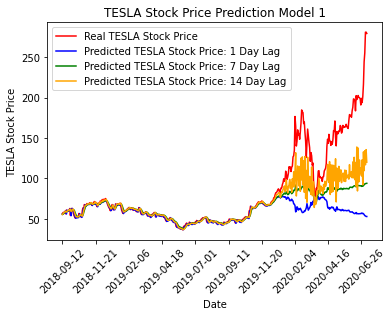

In [190]:
# Visualising the results
plt.plot(df.loc[800:, "Date"], dataset_test.values, color = "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"], predicted_stock_price_1, color = "blue", label = "Predicted TESLA Stock Price: 1 Day Lag")
plt.plot(df.loc[800:, "Date"], predicted_stock_price_7, color = "green", label = "Predicted TESLA Stock Price: 7 Day Lag")
plt.plot(df.loc[800:, "Date"], predicted_stock_price_14, color = "orange", label = "Predicted TESLA Stock Price: 14 Day Lag")
plt.xticks(np.arange(0,459,50))
plt.xticks(rotation = 45)
plt.title('TESLA Stock Price Prediction Model 1')
plt.xlabel('Date')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

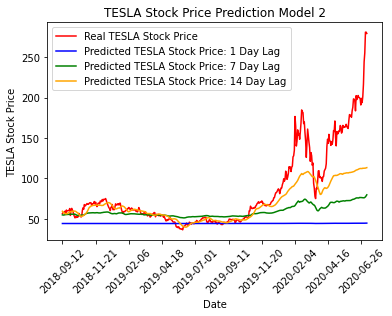

In [191]:
# Visualising the results
plt.plot(df.loc[800:, "Date"], dataset_test.values, color = "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"], predicted_stock_price_1_2, color = "blue", label = "Predicted TESLA Stock Price: 1 Day Lag")
plt.plot(df.loc[800:, "Date"], predicted_stock_price_7_2, color = "green", label = "Predicted TESLA Stock Price: 7 Day Lag")
plt.plot(df.loc[800:, "Date"], predicted_stock_price_14_2, color = "orange", label = "Predicted TESLA Stock Price: 14 Day Lag")
plt.xticks(np.arange(0,459,50))
plt.xticks(rotation = 45)
plt.title('TESLA Stock Price Prediction Model 2')
plt.xlabel('Date')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

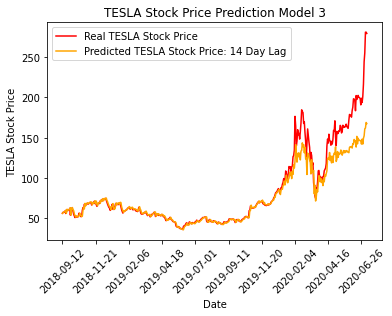

In [192]:
plt.plot(df.loc[800:, "Date"], dataset_test.values, color = "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"], predicted_stock_price_14_3, color = "orange", label = "Predicted TESLA Stock Price: 14 Day Lag")
plt.xticks(np.arange(0,459,50))
plt.xticks(rotation = 45)
plt.title('TESLA Stock Price Prediction Model 3')
plt.xlabel('Date')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

### Comparisons of the Models

Of the three different kinds of models that were used, the third model with the three hidden layers and no dropout seems to perform the best on the testing data. In general, the models that use the 14 days of lags seem to perform better in all 3 of the model architectures

### MSE of each model

In [193]:
# Evaluation of the models
from sklearn.metrics import mean_squared_error

print("The MSE for Model 1 and 1 Lags is: ", mean_squared_error(dataset_test.values, predicted_stock_price_1))
print("The MSE for Model 1 and 7 Lags is: ", mean_squared_error(dataset_test.values, predicted_stock_price_7))
print("The MSE for Model 1 and 14 Lags is: ", mean_squared_error(dataset_test.values, predicted_stock_price_14))

print("The MSE for Model 2 and 1 Lags is: ", mean_squared_error(dataset_test.values, predicted_stock_price_1))
print("The MSE for Model 2 and 7 Lags is: ", mean_squared_error(dataset_test.values, predicted_stock_price_7))
print("The MSE for Model 2 and 14 Lags is: ", mean_squared_error(dataset_test.values, predicted_stock_price_14))

print("The MSE for Model 3 and 14 Lags is: ", mean_squared_error(dataset_test.values, predicted_stock_price_14_3))

The MSE for Model 1 and 1 Lags is:  2673.677130061425
The MSE for Model 1 and 7 Lags is:  1558.3190848061306
The MSE for Model 1 and 14 Lags is:  1019.3966310567469
The MSE for Model 2 and 1 Lags is:  2673.677130061425
The MSE for Model 2 and 7 Lags is:  1558.3190848061306
The MSE for Model 2 and 14 Lags is:  1019.3966310567469
The MSE for Model 3 and 14 Lags is:  366.0657461932419


### Forecasting 2 weeks in to the future

In [198]:
# Forecasting two weeks in to the future
# 1 Lag

first_pred = model_1_1.predict(X_test_1[-1:,])
forecast_1_14 = []
forecast_1_14.append(first_pred)
for i in range(13):
  x = forecast_1_14[-1]
  pred = model_1_1.predict(x)
  forecast_1_14.append(pred)
forecast_1_14 = [sc.inverse_transform(i) for i in forecast_1_14]

# 7 Day Lag
first_pred = model_1_7.predict(X_test_7[-1:,])
test_vals = []
first_x = X_test_7[-1:,][0].copy()
first_x.resize((6,1))
first_x[5] = first_pred[0]
test_vals.append(np.array(first_x[1:]))

forecast_7_14 = []
forecast_7_14.append(sc.inverse_transform(first_pred))
for i in range(13):
  x = test_vals[-1].copy()
  pred = model_1_7.predict(x)
  forecast_7_14.append(sc.inverse_transform(pred)[0])

  x.resize((6,1), refcheck=False)
  new_x = x.copy()
  new_x[5] = pred[0]
  test_vals.append(new_x[1:])


# 14 Day Lag
first_pred = model_1_14.predict(X_test_14[-1:,])
test_vals = []
first_x = X_test_14[-1:,][0].copy()
first_x.resize((11,1))
first_x[5] = first_pred[0]
test_vals.append(np.array(first_x[1:]))

forecast_14_14 = []
forecast_14_14.append(sc.inverse_transform(first_pred))
for i in range(13):
  x = test_vals[-1].copy()
  pred = model_1_7.predict(x)
  forecast_14_14.append(sc.inverse_transform(pred)[0])

  x.resize((11,1), refcheck=False)
  new_x = x.copy()
  new_x[10] = pred[0]
  test_vals.append(new_x[1:])

# 14 Day Lag Model 3
first_pred = model_3_14.predict(X_test_14[-1:,])
test_vals = []
first_x = X_test_14[-1:,][0].copy()
first_x.resize((11,1))
first_x[5] = first_pred[0]
test_vals.append(np.array(first_x[1:]))

forecast_14_14_3 = []
forecast_14_14_3.append(sc.inverse_transform(first_pred))
for i in range(13):
  x = test_vals[-1].copy()
  pred = model_1_7.predict(x)
  forecast_14_14_3.append(sc.inverse_transform(pred)[0])

  x.resize((11,1), refcheck=False)
  new_x = x.copy()
  new_x[10] = pred[0]
  test_vals.append(new_x[1:])

### Plots of the Forecast

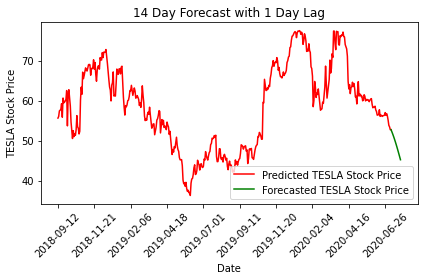

In [195]:
# Visualising the results
import datetime as dt
datelist = pd.date_range('2020-07-09', periods=14).to_list()
datelist = [i.strftime('%Y-%m-%d') for i in datelist]


plt.plot(df.loc[800:, "Date"], predicted_stock_price_1, color = "red", label = "Predicted TESLA Stock Price")
plt.plot(datelist, [i[0] for i in forecast_1_14], color = "green", label = "Forecasted TESLA Stock Price")


plt.xticks(np.arange(0,459,50))
plt.xticks(rotation = 45)
plt.title('14 Day Forecast with 1 Day Lag')
plt.xlabel('Date')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


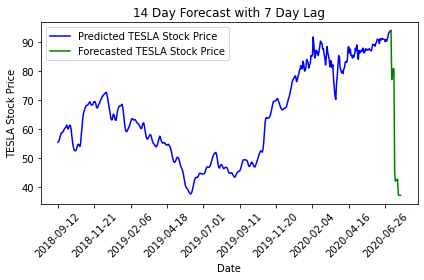

In [196]:
plt.plot(df.loc[800:, "Date"], predicted_stock_price_7, color = "blue", label = "Predicted TESLA Stock Price")

plt.plot(datelist, forecast_7_14, color = "green", label = "Forecasted TESLA Stock Price")

plt.xticks(np.arange(0,459,50))
plt.xticks(rotation = 45)
plt.title('14 Day Forecast with 7 Day Lag')
plt.xlabel('Date')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


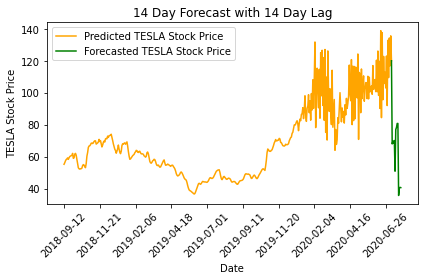

In [197]:
plt.plot(df.loc[800:, "Date"], predicted_stock_price_14, color = "orange", label = "Predicted TESLA Stock Price")

plt.plot(datelist, forecast_14_14, color = "green", label = "Forecasted TESLA Stock Price")

plt.xticks(np.arange(0,459,50))
plt.xticks(rotation = 45)
plt.title('14 Day Forecast with 14 Day Lag')
plt.xlabel('Date')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


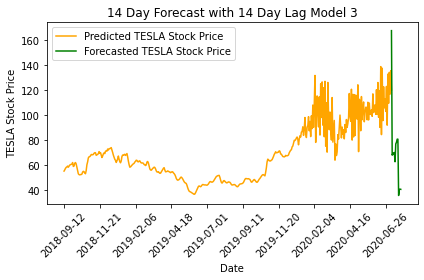

In [199]:
plt.plot(df.loc[800:, "Date"], predicted_stock_price_14, color = "orange", label = "Predicted TESLA Stock Price")

plt.plot(datelist, forecast_14_14_3, color = "green", label = "Forecasted TESLA Stock Price")

plt.xticks(np.arange(0,459,50))
plt.xticks(rotation = 45)
plt.title('14 Day Forecast with 14 Day Lag Model 3')
plt.xlabel('Date')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.tight_layout()
plt.show()

### Forecast Results

The forecasts all seem to indicate similar patterns. Over time the value tends toward the near constant values that were present during the beginning of the sampling period-- putting less weight on the differing trends that resulted due to COVID

### Sources:
https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model-6223e9644a2f
